In [239]:
import json
import sys
import dropbox
import requests
import pandas as pd

import networkx as nx
import matplotlib
import pyvis
import plotly.graph_objects as go

In [238]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=01cd996cd7a8f238ca78ad5c3f72a4e21cbf544abf62e6d061dc8cfb15cd6b08
  Stored in directory: C:\Users\thinkpad\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [240]:
ws_pathlist = json.loads(
    requests.get(
        "https://borza-hotelcom-data.s3.eu-central-1.amazonaws.com/whoscored-matchlist.json"
    ).content
)

In [241]:
dics = [
    json.loads(requests.get(ws_pathlist[i]).content) for i in range(len(ws_pathlist))
]

ConnectionError: HTTPSConnectionPool(host='borza-hotelcom-data.s3.eu-central-1.amazonaws.com', port=443): Max retries exceeded with url: /whoscored-match-1376247.json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002038C66E048>: Failed to establish a new connection: [WinError 10060] A kapcsolódási kísérlet nem sikerült, mert a kapcsolódó partner nem válaszolt a megadott időn belül, vagy a létrehozott kapcsolatban hiba történt, mert a kapcsolódó partner nem volt képes válaszolni'))

with open('main_dic.json') as json_file:
    dics = json.load(json_file)

In [242]:
types = set([i["type"]["displayName"] for i in dics[2]["events"]])

In [243]:
passes = []
for i in range(len(dics[2]["events"])):
    if (
        dics[2]["events"][i]["type"]["displayName"] == "Pass"
        and dics[2]["events"][i]["outcomeType"]["displayName"] == "Successful"
        and dics[2]["events"][i]["teamId"] == dics[2]["events"][i + 1]["teamId"]
    ):
        dics[2]["events"][i]["recieverId"] = dics[2]["events"][i + 1]["playerId"]
        passes.append(dics[2]["events"][i])

In [244]:
passes_df = pd.DataFrame(passes)

In [245]:
passes_df = passes_df[["playerId","recieverId","teamId"]]

In [246]:
passes_df['passes']='faszom'

In [247]:
test_df=passes_df.groupby(["playerId","recieverId","teamId"]).count().reset_index()

In [248]:
test_df=test_df[test_df['playerId']!=test_df['recieverId']]

In [249]:
test_df

,playerId,recieverId,teamId,passes
1,9446,31958,67,4
2,9446,33724,67,7
3,9446,68585,67,2
4,9446,68732,67,1
5,9446,77417,67,1
...,...,...,...,...
187,363966,133445,70,4
188,363966,135572,70,4
189,363966,323148,70,4
190,384566,106596,70,1


In [264]:
G=nx.DiGraph()
for i in range(1,(1+len(test_df))):
    G.add_edge(test_df.loc[i,'playerId'], test_df.loc[i,'recieverId'], weight=test_df.loc[i,'passes'])

In [265]:
print(nx.is_weighted(G))
print(nx.is_directed(G))
print(nx.info(G))

True
True
Name: 
Type: DiGraph
Number of nodes: 28
Number of edges: 191
Average in degree:   6.8214
Average out degree:   6.8214


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



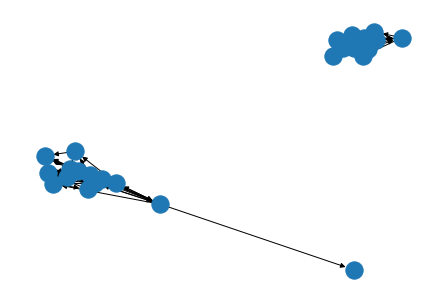

In [252]:
nx.draw(G)

In [253]:
cc=nx.closeness_centrality(G, u=None, distance=None, wf_improved=False)

In [254]:
CC_df=pd.DataFrame.from_dict(cc,orient='index', columns=['CC'])

In [255]:
test_df=test_df.merge(CC_df, how='left', left_on='playerId', right_index=True)

In [256]:
test_df

,playerId,recieverId,teamId,passes,CC
1,9446,31958,67,4,0.764706
2,9446,33724,67,7,0.764706
3,9446,68585,67,2,0.764706
4,9446,68732,67,1,0.764706
5,9446,77417,67,1,0.764706
...,...,...,...,...,...
187,363966,133445,70,4,0.666667
188,363966,135572,70,4,0.666667
189,363966,323148,70,4,0.666667
190,384566,106596,70,1,0.631579


In [257]:
from pyvis.network import Network

OutEdgeView([(9446, 31958), (9446, 33724), (9446, 68585), (9446, 68732), (9446, 77417), (9446, 90778), (9446, 102439), (9446, 105591), (9446, 115587), (9446, 134984), (31958, 9446), (31958, 33724), (31958, 68732), (31958, 77417), (31958, 90778), (31958, 102439), (31958, 105591), (31958, 134984), (31958, 323547), (31958, 362275), (33724, 9446), (33724, 31958), (33724, 68732), (33724, 77417), (33724, 90778), (33724, 91267), (33724, 102439), (33724, 105591), (33724, 115587), (33724, 134984), (33724, 362275), (68585, 9446), (68585, 77417), (68585, 91267), (68585, 323547), (68732, 9446), (68732, 33724), (68732, 90778), (68732, 134984), (77417, 9446), (77417, 31958), (77417, 33724), (77417, 90778), (77417, 91267), (77417, 115587), (77417, 134984), (90778, 9446), (90778, 31958), (90778, 33724), (90778, 68732), (90778, 77417), (90778, 102439), (90778, 105591), (90778, 134984), (90778, 362275), (102439, 9446), (102439, 31958), (102439, 33724), (102439, 68732), (102439, 90778), (102439, 105591),

In [288]:
g = ig.Graph(directed=True)

g = ig.Graph.Adjacency((nx.to_numpy_matrix(G) > 0).tolist())


In [282]:
import igraph as ig

In [292]:
test_df

,playerId,recieverId,teamId,passes,CC
1,9446,31958,67,4,0.764706
2,9446,33724,67,7,0.764706
3,9446,68585,67,2,0.764706
4,9446,68732,67,1,0.764706
5,9446,77417,67,1,0.764706
...,...,...,...,...,...
187,363966,133445,70,4,0.666667
188,363966,135572,70,4,0.666667
189,363966,323148,70,4,0.666667
190,384566,106596,70,1,0.631579


In [322]:
g = ig.Graph(directed=True)

g = ig.Graph.Adjacency((nx.to_numpy_matrix(G) > 0).tolist())
g.vs['label']=test_df['playerId'].unique()

In [324]:
labels=list(g.vs['label'])
N=len(labels)
E=[e.tuple for e in g.es]# list of edges
layt=g.layout('kk') #kamada-kawai layout
type(layt)

igraph.layout.Layout

In [339]:
import pkg_resources
pkg_resources.require("plotly==3.10.0")
import plotly

DistributionNotFound: The 'plotly==3.10.0' distribution was not found and is required by the application

In [342]:
pip install --force-reinstall plotly==3.10.0

  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c5/8f/51e89ce52a085483359217bc72cdbf6e75ee595d5b1d4b5ade40c7e018b8/jsonschema-3.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fa/bc/9bd3b5c2b4774d5f33b2d544f1460be9df7df2fe42f352135381c347c69a/ipython_genutils-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ca/ab/872a23e29cec3cf2594af7e857f18b687ad21039c1f9b922fac5b9b142d5/traitlets-4.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/db/4313ab3be961f7a763066401fb77f7748373b6094076ae2bda2806988af6/attrs-19.3.0-py2.py3-none-any.whl
  Created wheel for pyrsistent: filename=pyrsistent-0.16.0-cp37-cp37m-win_amd64.whl size=56582 sha256=fcf725e7004d07c80a59c61fedcac4c63006eddac174471fea5729f8094c1e40
  Stored in directory: C:\Users\thinkp

ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: astroid 2.3.1 has requirement six==1.12, but you'll have six 1.14.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] A hozzáférés megtagadva: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\six.cpython-37.pyc'
Consider using the `--user` option or check the permissions.



In [343]:
#import plotly.plotly as py
#from plotly.graph_objs import *
#import chart_studio.plotly as py
from plotly.offline import plot 
chart_studio.plotly
import chart_studio.plotly as py


Xn=[layt[k][0] for k in range(N)]
Yn=[layt[k][1] for k in range(N)]
Xe=[]
Ye=[]
for e in E:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]

trace1=Scatter(x=Xe,
               y=Ye,
               mode='lines',
               line= dict(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace2=Scatter(x=Xn,
               y=Yn,
               mode='markers',
               name='ntw',
               marker=dict(symbol='circle-dot',
                                        size=5,
                                        color='#6959CD',
                                        line=dict(color='rgb(50,50,50)', width=0.5)
                                        ),
               text=labels,
               hoverinfo='text'
               )

axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

width=800
height=800
layout=Layout(title= "Coauthorship network of scientists working on network theory and experiment"+\
              "<br> Data source: <a href='https://networkdata.ics.uci.edu/data.php?id=11'> [1]</a>",
    font= dict(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=layout.XAxis(axis),
    yaxis=layout.YAxis(axis),
    margin=layout.Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=[
           dict(
           showarrow=False,
            text='This igraph.Graph has the Kamada-Kawai layout',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.1,
            xanchor='left',
            yanchor='bottom',
            font=dict(
            size=14
            )
            )
        ]
    )

data=[trace1, trace2]
fig=Figure(data=data, layout=layout)
py.iplot(fig, filename='Coautorship-network-igraph')

AttributeError: 'Layout' object has no attribute 'XAxis'

In [326]:
!pip install chart_studio

In [340]:
from plotly.offline import plot 
chart_studio.plotly

<module 'chart_studio.plotly' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\chart_studio\\plotly\\__init__.py'>

In [330]:
import chart_studio.plotly

In [261]:


node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [ ]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [209]:
test_df['color']=test_df.apply( lambda x: 'red' if x['teamId']==67 else 'blue', axis=1 )

In [210]:
test_df

,playerId,recieverId,teamId,passes,CC,color
1,9446,31958,67,4,0.764706,red
2,9446,33724,67,7,0.764706,red
3,9446,68585,67,2,0.764706,red
4,9446,68732,67,1,0.764706,red
5,9446,77417,67,1,0.764706,red
...,...,...,...,...,...,...
187,363966,133445,70,4,0.666667,blue
188,363966,135572,70,4,0.666667,blue
189,363966,323148,70,4,0.666667,blue
190,384566,106596,70,1,0.631579,blue


In [232]:
got_net = Network(height="750px", width="50%", bgcolor="148108", font_color="white",directed=True,
                 notebook=False)
got_net.barnes_hut()
sources = test_df['playerId']
targets = test_df['recieverId']
weights = test_df['passes']
size    = test_df['CC']
color   = test_df['color']

edge_data = zip(sources, targets, weights, size, color)
for e in edge_data:
    src = str(e[0])
    dst = str(e[1])
    w = e[2]
    s=e[3]
    c=e[4]
    got_net.add_node(src, src, title=src, size=s, color=c)
    got_net.add_node(dst, dst, title=dst, size=s, color=c)
    got_net.add_edge(src, dst, value=w)
    neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])
    


    
got_net.show_buttons()
got_net.show("gameofthrones.html")

UnicodeDecodeError: 'charmap' codec can't decode byte 0x83 in position 250: character maps to <undefined>

In [221]:
got_net.show_buttons(filter_=['physics'])

In [197]:
got_net.show('dot.html')

TypeError: argument of type 'int' is not iterable

In [236]:
from pyvis.network import Network
import pandas as pd
got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("https://www.macalester.edu/~abeverid/data/stormofswords.csv")
sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)
for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)
    neighbor_map = got_net.get_adj_list()
# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])
got_net.show("gameofthrones.html")


In [186]:
got_data['Source'].sort_values().unique()

array(['Aemon', 'Aerys', 'Alliser', 'Amory', 'Arya', 'Balon', 'Belwas',
       'Beric', 'Bran', 'Brienne', 'Bronn', 'Brynden', 'Catelyn',
       'Cersei', 'Craster', 'Daario', 'Daenerys', 'Davos', 'Eddard',
       'Eddison', 'Edmure', 'Gendry', 'Gilly', 'Gregor', 'Hodor',
       'Hoster', 'Irri', 'Jaime', 'Janos', 'Joffrey', 'Jojen', 'Jon',
       'Jon Arryn', 'Jorah', 'Kevan', 'Loras', 'Lothar', 'Luwin', 'Lysa',
       'Mance', 'Meera', 'Melisandre', 'Meryn', 'Missandei', 'Myrcella',
       'Oberyn', 'Podrick', 'Rattleshirt', 'Renly', 'Rhaegar', 'Rickard',
       'Rickon', 'Robb', 'Robert', 'Robert Arryn', 'Roose', 'Samwell',
       'Sandor', 'Sansa', 'Shae', 'Shireen', 'Stannis', 'Tommen',
       'Tyrion', 'Tywin', 'Val', 'Varys', 'Viserys', 'Walder', 'Walton',
       'Ygritte'], dtype=object)

In [185]:
got_data['Target'].sort_values().unique()

array(['Aegon', 'Aemon', 'Alliser', 'Anguy', 'Arya', 'Balon', 'Barristan',
       'Belwas', 'Beric', 'Bowen', 'Bran', 'Brienne', 'Bronn', 'Brynden',
       'Catelyn', 'Cersei', 'Chataya', 'Craster', 'Cressen', 'Daario',
       'Dalla', 'Davos', 'Doran', 'Drogo', 'Eddison', 'Edmure', 'Elia',
       'Ellaria', 'Gendry', 'Gilly', 'Gregor', 'Grenn', 'Hodor', 'Hoster',
       'Illyrio', 'Ilyn', 'Irri', 'Jaime', 'Janos', 'Jeyne', 'Joffrey',
       'Jojen', 'Jon', 'Jorah', 'Karl', 'Kevan', 'Kraznys', 'Lancel',
       'Loras', 'Lothar', 'Luwin', 'Lysa', 'Mace', 'Mance', 'Margaery',
       'Marillion', 'Meera', 'Melisandre', 'Meryn', 'Missandei',
       'Myrcella', 'Nan', 'Oberyn', 'Olenna', 'Orell', 'Petyr', 'Podrick',
       'Pycelle', 'Qhorin', 'Qyburn', 'Rakharo', 'Ramsay', 'Rattleshirt',
       'Renly', 'Rhaegar', 'Rickard', 'Rickon', 'Robb', 'Robert',
       'Robert Arryn', 'Roose', 'Roslin', 'Salladhor', 'Samwell',
       'Sandor', 'Sansa', 'Shae', 'Stannis', 'Styr', 'Theon', 'Thoros',
 

In [170]:
test_df

,playerId,recieverId,teamId,passes,CC,color
1,9446,31958,67,4,0.764706,red
2,9446,33724,67,7,0.764706,red
3,9446,68585,67,2,0.764706,red
4,9446,68732,67,1,0.764706,red
5,9446,77417,67,1,0.764706,red
...,...,...,...,...,...,...
187,363966,133445,70,4,0.666667,blue
188,363966,135572,70,4,0.666667,blue
189,363966,323148,70,4,0.666667,blue
190,384566,106596,70,1,0.631579,blue


In [190]:
players = []
for i in dics[2]["home"]["players"]:
    players.append([i["playerId"],i["name"]])
players = pd.DataFrame.from_records(players).rename(columns = {0:"playerId",1:"name"})
players["teamId"] = 67
home_players = players

In [191]:
players = []
for i in dics[2]["away"]["players"]:
    players.append([i["playerId"],i["name"]])
players = pd.DataFrame.from_records(players).rename(columns = {0:"playerId",1:"name"})
players["teamId"] = 70
away_players = players

In [193]:
home_players.head()

,playerId,name,teamId
0,68732,Tomás Vaclik,67
1,9446,Jesús Navas,67
2,134984,Diego Carlos,67
3,90778,Sergi Gómez,67
4,362275,Sergio Reguilón,67


In [194]:
away_players.head()

,playerId,name,teamId
0,10445,Diego López,70
1,80957,Javi López,70
2,67327,Bernardo Espinosa,70
3,73265,Leandro Cabrera,70
4,363966,Adrià Pedrosa,70


In [197]:
players = pd.concat([home_players,away_players])

In [210]:
draft = pd.merge(passes_df,players,how="left").rename(columns = {"name":"playerName"})

In [211]:
pd.merge(draft,players,hoe="left",on)

,playerId,recieverId,teamId,playerName
0,106596,73265,70,Sergi Darder
1,33556,80957,70,Víctor Sánchez
2,102439,33724,67,Franco Vázquez
3,33724,9446,67,Éver Banega
4,363966,33556,70,Adrià Pedrosa


In [185]:
team_id_dic = {
   dics[2][v]["teamId"]: f"{v} - {dics[2][v]['name']}" for v in ["home", "away"]
}

In [186]:
team_id_dic

{67: 'home - Sevilla', 70: 'away - Espanyol'}

In [118]:
away_players = []
for i in dics[2]["away"]["players"]:
    away_players.append({i["playerId"]:i["name"]})

In [120]:
home_players = pd.DataFrame(home_players)

In [123]:
home_players

[{68732: 'Tomás Vaclik', 'teamId': 67},
 {9446: 'Jesús Navas', 'teamId': 67},
 {134984: 'Diego Carlos', 'teamId': 67},
 {90778: 'Sergi Gómez', 'teamId': 67},
 {362275: 'Sergio Reguilón', 'teamId': 67},
 {33724: 'Éver Banega', 'teamId': 67},
 {102439: 'Franco Vázquez', 'teamId': 67},
 {31958: 'Fernando', 'teamId': 67},
 {105591: 'Suso', 'teamId': 67},
 {323547: 'Youssef En-Nesyri', 'teamId': 67},
 {115587: 'Lucas Ocampos', 'teamId': 67},
 {68585: 'Luuk de Jong', 'teamId': 67},
 {77417: 'Nemanja Gudelj', 'teamId': 67},
 {91267: 'Nolito', 'teamId': 67},
 {301019: 'Jules Koundé', 'teamId': 67},
 {136220: 'Yassine Bounou', 'teamId': 67},
 {89856: 'Sergio Escudero', 'teamId': 67},
 {143158: 'Munir El Haddadi', 'teamId': 67}]

In [ ]:
goals = []
for dic in dics:
    goals += get_goal_coordinates(dic)

In [ ]:
goals_df = pd.DataFrame(goals)
goals_df["team"] = [i[7:] for i in goals_df["team"]]

In [ ]:
with open('goal_df.json', 'w') as fp:
    json.dump(goals_df, fp)

In [ ]:
goals_df

In [95]:
team_id_dic = {
   dics[2][v]["teamId"]: f"{v} - {dics[2][v]['name']}" for v in ["home", "away"]
}

In [96]:
team_id_dic

{67: 'home - Sevilla', 70: 'away - Espanyol'}

In [ ]:
def get_v_info(v):
    tname = type(v).__name__
    try:
        l = len(v)
    except TypeError:
        l = 0
    if isinstance(v, dict):
        keys = v.keys()
    else:
        keys = []
    return {"type": tname, "length": l, "keys": keys, "size": sys.getsizeof(v)}

In [ ]:
pd.DataFrame({k: get_v_info(v) for k, v in ws_dic.items()}).T

In [ ]:
options = [{"label": e, "value": e} for e in goals_df["team"].unique()]

In [ ]:
max(goals_df["y"])

In [ ]:
px.scatter(goals_df, x="x", y="y", color="team",width = 1000, height = 400)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import plotly.express as px

# from data_processing import match_title, player_df, stat_df, touch_df

external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(
    children=[
        html.H1(children=f"Dash app - Goals"),
        dcc.Dropdown(
            id="team-dd",
            options=[{"label": e, "value": e} for e in ["all",*goals_df["team"].unique()],
        ),
        html.Div(
            children=[
                dcc.Graph(
                    id="event-graph",
                    figure=px.scatter(goals_df, x="x", y="y", color="team"),
                )
            ],
            className="twelve columns",
        ),
    ],
    className="row",
)


@app.callback(
    dash.dependencies.Output("event-graph", "figure"),
    [dash.dependencies.Input("team-dd", "value")],
)
def update_output(value):
    if (value is None) or (value == "all"):
        filt_df = goals_df
    else:
        filt_df = goals_df.loc[lambda df: df["team"] == value]
    return px.scatter(filt_df, x="x", y="y", color="team")


if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False, port=8053)